# Analysis of "Analyst-statistician" vacancies on Enbek.kz

### Introduction
In this project work vacancies were established. The data was collected from the state website Enbek.kz via parsing method. This is the portal of the electronic labor exchange. 

### Research question 
##### According to the latest data from Enbek.kz for the current months of 2020, what is the average proposed salary for analysts-statisticians depending on 1) the region and 2) the required work experience?


### Purposes of this project:

•	To find required average salary for whole country and for each region and compare the results

•	To evaluate correlation analysis between variables: proposed salary and required work experience

The necessary vacancies were found and displayed through the filters. Namely, the vacancies "Analyst-statistician" were selected. I parsed first 9 pages, that is 89 vacancies. 

Selected variables: job title, additional job description, industry, company name, salary, required work experience, education level, location and date.

In [5]:
#importing necessary libraries
import csv
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [18]:
#importing dataset from csv file
df = pd.read_csv('data1.csv')
df['Vacancy_Description'] = df['Vacancy_Description'].replace(np.nan, '-')
df.head()

,Vacancy,Vacancy_Description,Industry,Company,Salary,Experience,Education,Location,Working_schedule,Date
0,Статистик-аналитик,менеджер отдела статистики и анализа данных об...,"Образование, наука Математика","Филиал ""Центр педагогических измерений"" Автоно...",от 214 000 тг.,2 года стажа,послевузовское,г. НУР-СУЛТАН / район Есиль,полный рабочий день,22.09.2020
1,Врач-статистик,Врач статистик-аналитик,"Медицина, фармацевтика Медицина, фармацевтика","Товарищество с ограниченной ответственностью ""...",от 100 000 тг.,1 год стажа,высшее,КАРАГАНДИНСКАЯ ОБЛАСТЬ / г. Караганда,полный рабочий день,08.10.2020
2,Статистик,-,"Образование, наука Математика","КОММУНАЛЬНОЕ ГОСУДАРСТВЕННОЕ УЧРЕЖДЕНИЕ ""УПРАВ...",от 81 565 тг.,1 год стажа,высшее,АКМОЛИНСКАЯ ОБЛАСТЬ / Целиноградский район,полный рабочий день,21.09.2020
3,Аналитик,-,"Консалтинг, стратегическое развитие Аналитика","ТОВАРИЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""...",от 150 000 тг.,1 год стажа,высшее,г. НУР-СУЛТАН / район Есиль,полный рабочий день,23.09.2020
4,Аналитик,аналитик лаборатории исследования средств инфо...,"Консалтинг, стратегическое развитие Аналитика",Республиканское государственное предприятие на...,от 100 000 тг.,3 года стажа,высшее,г. НУР-СУЛТАН / район Есиль,полный рабочий день,25.09.2020


In [19]:
#Extracting only integer part from the 'Salary' column and saving to new column 'Salary_int'
df.Salary = df.Salary.str.replace(' ', '')
sal = df['Salary'].str.extract('(\d+)').astype(int) 
df['Salary_int'] = sal

#Some replacements in columns 'Experience' and 'Location'
df['Experience_int'] = df.Experience.replace({"1 год стажа": 1, "2 года стажа": 2, "3 года стажа": 3, "4 года стажа": 4, "5 лет стажа": 5, "Без опыта работы": 0})

df['Location'] = df['Location'].str.upper()
df.loc[df['Location'].str.contains('НУР-СУЛТАН'), 'Location'] = 'АКМОЛИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АЛМАТЫ'), 'Location'] = 'АЛМАТИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КАРАГАНДА'), 'Location'] = 'КАРАГАНДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АКТОБЕ'), 'Location'] = 'АКТЮБИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АТЫРАУ'), 'Location'] = 'АТЫРАУСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('УРАЛЬСК'), 'Location'] = 'ВКО'
df.loc[df['Location'].str.contains('ТАРАЗ'), 'Location'] = 'ЖАМБЫЛСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ШЫМКЕНТ'), 'Location'] = 'ТУРКЕСТАНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КЫЗЫЛОРДА'), 'Location'] = 'КЫЗЫЛОРДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ТУРКЕСТАН'), 'Location'] = 'ТУРКЕСТАНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КОСТАНАЙ'), 'Location'] = 'КОСТАНАЙСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КОКШЕТАУ'), 'Location'] = 'АКМОЛИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ТЕМИРТАУ'), 'Location'] = 'КАРАГАНДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АКМОЛИНСКАЯ'), 'Location'] = 'АКМОЛИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('В-КАЗАХСТАНСКАЯ'), 'Location'] = 'ВКО'
df.loc[df['Location'].str.contains('МАНГИСТАУСКАЯ'), 'Location'] = 'МАНГИСТАУСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('З-КАЗАХСТАНСКАЯ'), 'Location'] = 'ЗКО'
df.loc[df['Location'].str.contains('С-КАЗАХСТАНСКАЯ'), 'Location'] = 'CКО'
df.loc[df['Location'].str.contains('КАРАГАНДИНСКАЯ'), 'Location'] = 'КАРАГАНДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АЛМАТИНСКАЯ'), 'Location'] = 'АЛМАТИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ПАВЛОДАРСКАЯ'), 'Location'] = 'ПАВЛОДАРСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('РЕСПУБЛИКА'), 'Location'] = 'АКМОЛИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ЖАМБЫЛСКАЯ'), 'Location'] = 'ЖАМБЫЛСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КЫЗЫЛОРДИНСКАЯ'), 'Location'] = 'КЫЗЫЛОРДИНСКАЯ_ОБЛ'

df.head()


,Vacancy,Vacancy_Description,Industry,Company,Salary,Experience,Education,Location,Working_schedule,Date,Salary_int,Experience_int
0,Статистик-аналитик,менеджер отдела статистики и анализа данных об...,"Образование, наука Математика","Филиал ""Центр педагогических измерений"" Автоно...",от214000тг.,2 года стажа,послевузовское,АКМОЛИНСКАЯ_ОБЛ,полный рабочий день,22.09.2020,214000,2
1,Врач-статистик,Врач статистик-аналитик,"Медицина, фармацевтика Медицина, фармацевтика","Товарищество с ограниченной ответственностью ""...",от100000тг.,1 год стажа,высшее,КАРАГАНДИНСКАЯ_ОБЛ,полный рабочий день,08.10.2020,100000,1
2,Статистик,-,"Образование, наука Математика","КОММУНАЛЬНОЕ ГОСУДАРСТВЕННОЕ УЧРЕЖДЕНИЕ ""УПРАВ...",от81565тг.,1 год стажа,высшее,АКМОЛИНСКАЯ_ОБЛ,полный рабочий день,21.09.2020,81565,1
3,Аналитик,-,"Консалтинг, стратегическое развитие Аналитика","ТОВАРИЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""...",от150000тг.,1 год стажа,высшее,АКМОЛИНСКАЯ_ОБЛ,полный рабочий день,23.09.2020,150000,1
4,Аналитик,аналитик лаборатории исследования средств инфо...,"Консалтинг, стратегическое развитие Аналитика",Республиканское государственное предприятие на...,от100000тг.,3 года стажа,высшее,АКМОЛИНСКАЯ_ОБЛ,полный рабочий день,25.09.2020,100000,3


In [34]:
#Firstly look through at salary across the country
df.Salary_int.dropna().describe().round(1)

count        89.0
mean     109247.8
std       62195.5
min       42500.0
25%       68522.0
50%      100000.0
75%      126000.0
max      300000.0
Name: Salary_int, dtype: float64

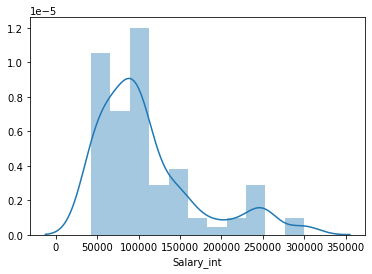

In [35]:
sns.distplot(df.Salary_int.dropna())

In [104]:
#now divide average salaries of regions into two groups: less than average salary of whole country and more 
df["Salary_int_g"] = pd.cut(df.Salary_int, [0, df.Salary_int.mean(), 300000])
df1 = df[["Location", "Salary_int_g"]].dropna()
pd.crosstab(df1.Location, df1.Salary_int_g, margins=True, normalize='index')

Salary_int_g,"(0.0, 109247.798]","(109247.798, 300000.0]"
Location,,
CКО,0.000000,1.000000
АКМОЛИНСКАЯ_ОБЛ,0.722222,0.277778
АКТЮБИНСКАЯ_ОБЛ,1.000000,0.000000
АЛМАТИНСКАЯ_ОБЛ,0.600000,0.400000
АТЫРАУСКАЯ_ОБЛ,0.666667,0.333333
ВКО,0.600000,0.400000
ЖАМБЫЛСКАЯ_ОБЛ,0.600000,0.400000
ЗКО,0.750000,0.250000
КАРАГАНДИНСКАЯ_ОБЛ,0.714286,0.285714


In [70]:
df2 = df.groupby("Location").agg({"Salary_int": np.mean}).round().sort_values("Salary_int")
df2

,Salary_int
Location,
АТЫРАУСКАЯ_ОБЛ,68333.0
АКТЮБИНСКАЯ_ОБЛ,75000.0
КОСТАНАЙСКАЯ_ОБЛ,87000.0
МАНГИСТАУСКАЯ_ОБЛ,90000.0
ВКО,99782.0
КАРАГАНДИНСКАЯ_ОБЛ,99843.0
ЖАМБЫЛСКАЯ_ОБЛ,102387.0
ПАВЛОДАРСКАЯ_ОБЛ,103000.0
АКМОЛИНСКАЯ_ОБЛ,105941.0


In [86]:
#get regions, where average salary is more than average salary of whole country 
average_whole = df.Salary_int.mean()
more = df2["Salary_int"] > average_whole
more

Location
АТЫРАУСКАЯ_ОБЛ        False
АКТЮБИНСКАЯ_ОБЛ       False
КОСТАНАЙСКАЯ_ОБЛ      False
МАНГИСТАУСКАЯ_ОБЛ     False
ВКО                   False
КАРАГАНДИНСКАЯ_ОБЛ    False
ЖАМБЫЛСКАЯ_ОБЛ        False
ПАВЛОДАРСКАЯ_ОБЛ      False
АКМОЛИНСКАЯ_ОБЛ       False
ЗКО                    True
ТУРКЕСТАНСКАЯ_ОБЛ      True
АЛМАТИНСКАЯ_ОБЛ        True
КЫЗЫЛОРДИНСКАЯ_ОБЛ     True
CКО                    True
Name: Salary_int, dtype: bool

In [79]:
#get regions, where average salary is less than average salary of whole country 
less = df2["Salary_int"] < average_whole
less

Location
АТЫРАУСКАЯ_ОБЛ         True
АКТЮБИНСКАЯ_ОБЛ        True
КОСТАНАЙСКАЯ_ОБЛ       True
МАНГИСТАУСКАЯ_ОБЛ      True
ВКО                    True
КАРАГАНДИНСКАЯ_ОБЛ     True
ЖАМБЫЛСКАЯ_ОБЛ         True
ПАВЛОДАРСКАЯ_ОБЛ       True
АКМОЛИНСКАЯ_ОБЛ        True
ЗКО                   False
ТУРКЕСТАНСКАЯ_ОБЛ     False
АЛМАТИНСКАЯ_ОБЛ       False
КЫЗЫЛОРДИНСКАЯ_ОБЛ    False
CКО                   False
Name: Salary_int, dtype: bool

Text(0.5, 1.0, 'Box plot of salaries by regions')

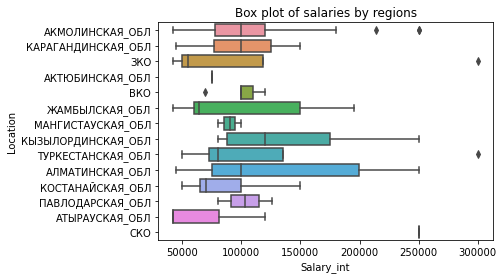

In [51]:
sns.boxplot(x = "Salary_int", y = "Location", data = df).set_title("Box plot of salaries by regions")

Now, let's establish relationship between work experience and salary.

In [87]:
#calculate the Pearson’s correlation coefficient between work experience and salary
corr, _ = pearsonr(df.Experience_int, df.Salary_int)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.336


Pearson’s Correlation Coefficient Tests whether work experience and salary have a linear relationship.

Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

In [88]:
stat, p = pearsonr(df.Experience_int, df.Salary_int)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.336, p=0.001
Probably dependent


In [109]:
#calculate the Spearman’s correlation coefficient between work experience and salary
corr, _ = spearmanr(df.Experience_int, df.Salary_int)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.439


Spearman’s Rank Correlation Tests whether work experience and salary have a monotonic relationship.

Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

In [110]:
stat, p = spearmanr(df.Experience_int, df.Salary_int)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.439, p=0.000
Probably dependent


In [111]:
#average salary by required work experience 
df3 = df.groupby("Experience_int").agg({"Salary_int": np.mean}).round().sort_values("Salary_int")
df3

,Salary_int
Experience_int,
5,57500.0
0,79112.0
1,93296.0
2,133083.0
3,148409.0
4,175000.0


Text(0.5, 1.0, 'Box plot of salaries by work experience')

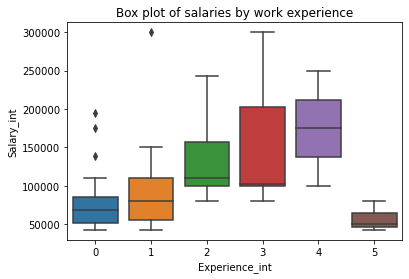

In [112]:
sns.boxplot(x = "Experience_int", y = "Salary_int", data = df).set_title("Box plot of salaries by work experience")

# Conclusion

The main task of this project was to find the answer to the research question of interest using some data analysis tools in Python. There were two main purposes of this project. They are: to find required average salary for whole country and for each region and compare the results; and to evaluate correlation analysis between variables: salary and required work experience.

Regarding to the first purpose, firstly evaluated salary across the country and average salary was equal to 109247.8. 68% of all vacancies had salary less than average salary and accordingly 32% had more, which means that the number of regions with a large salary is less than with a small salary. It can be seen from the results by regions, there are 5 regions with higher than average salary, and 9 regions with lower. Visulisation is presented in the form of a box plot. 

Then established relationship between work experience and salary. Firstly, the correlation coefficients of Pearson and Spearman were found. In the case of Pearson, the coefficient was 0.336, in the case of Spearman, 0.439. In both cases correlation coefficient is positive moderate, which indicates direct proportional relationship.

Further, thanks to correlation tests, a relationship was established between the proposed salary and the required work experience. Both tests have some assumptions that were taken into account and were satisfied:

Assumptions of Pearson’s Correlation Test

1. Observations in each sample are independent and identically distributed (iid).
2. Observations in each sample are normally distributed.
3. Observations in each sample have the same variance.

Assumptions of Spearman’s Correlation Test

1. Observations in each sample are independent and identically distributed (iid).
2. Observations in each sample can be ranked.

From the table and boxplot, we see that in general, the more work experience required, the higher the salary offered, but there is a deviation in the case of 5 years. The highest proposed average salary to 4 years of experience equals to 175000.0 and to 3 years of experience equals to 148409.0.

So, in general, the highest salary of vacancies analyst-statistician in regions Kyzylorda, Almaty and Akmola with required 3-4 years of work experience.



In order to improve the analysis, a larger sample size is needed, because more accurate results by region will be obtained, for example, in the case of the region of northern Kazakhstan, there is only one vacancy, which makes it impossible to draw conclusions about the average. Also, there can be added hypothesis tests to accurate results.

I may therefore conclude that Python libraries (as pandas, statsmodels, matplotlib) justify more mathematical formulas for statistical inference (as mean estimation, standard deviation, coefficient of correlation, and so on). So, in Python, it's very easy to do analysis.